In [1]:
suppressPackageStartupMessages(library(circlize))
library(circlize)
library(RColorBrewer)

In [2]:
path_to_file = '../results/datasets/254_circos.tsv'
out_file = '../results/figures/254.pdf'
circos.clear()

In [9]:
# Import adjacency matrix
mat = read.table(path_to_file,header=TRUE,row.names=1)
mat <- as.matrix(mat)

In [10]:
mat

,IGHV1.2,IGHV1.3,IGHV1.18,IGHV1.24,IGHV1.46,IGHV1.69,IGHV1.69.2,IGHV2.5,IGHV2.26,IGHV2.70,⋯,IGHV4.30.4,IGHV4.31,IGHV4.34,IGHV4.38.2,IGHV4.39,IGHV4.59,IGHV4.61,IGHV5.10.1,IGHV5.51,IGHV7.4.1
IGKV1-5,1,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
IGKV1-6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
IGKV1-8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IGKV1-9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IGKV1-12,1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IGKV1-16,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IGKV1-17,0,1,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IGKV1-27,0,0,0,0,0,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IGKV1-33,1,2,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
IGKV1-39,0,1,0,0,0,1,0,2,0,1,⋯,0,1,0,0,2,2,1,0,0,0


In [11]:
# Set color pallete
n <- length(union(rownames(mat), colnames(mat)))
colrs <- brewer.pal.info[brewer.pal.info$colorblind == TRUE, ]
col_vec = unlist(mapply(brewer.pal, colrs$maxcolors, rownames(colrs)))
whites = c('#F5F5F5','#F7F7F7','#F6E8C3','#FDE0EF','#E7D4E8','#E6F5D0')
grid_col <- setdiff(col_vec,whites)[1:n]

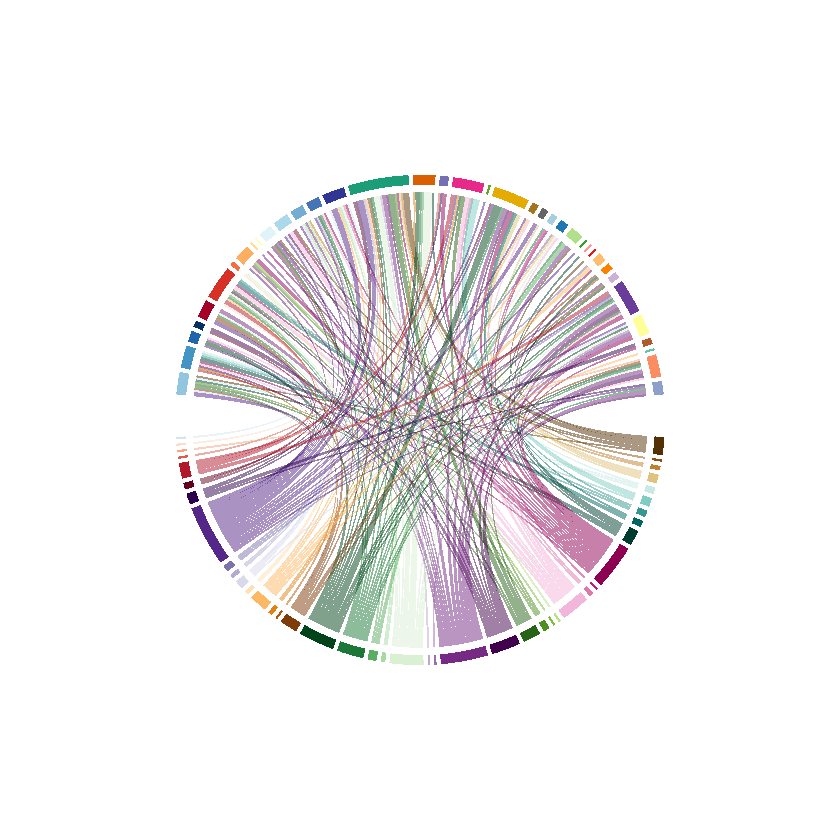

In [15]:
# Circos plot
#pdf(out_file, width = 20,height = 20)
chordDiagram(mat,grid.col = grid_col, annotationTrack = "grid",
             annotationTrackHeight = mm_h(2),
             preAllocateTracks = list(track.height = max(strwidth(unlist(dimnames(mat))))))

In [13]:
# Twist labels perpendicular to plot
circos.track(track.index = 1, panel.fun = function(x, y) {
  circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index, 
              facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5),
              cex=1.2)}, bg.border = NA) # here set bg.border to NA is important
dev.off()
print('Circos plot created')

ERROR: Error in polygon(polar2Cartesian(d2), ...): plot.new has not been called yet
